In [ ]:
!gpu-who

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
from import_for_notebooks import *
torch.set_default_dtype(torch.float64)

import common_utils
import analysis
import analysis_utils
from analysis import find_nearest_neighbour, scale, sort_by_metric

IMPORTANT IMPORTED! 2023-02-12 23:34:25.514647
device=cpu


In [5]:
# in case you have your own sweep:
# sweep_id = 'uvl74ek9'
# sweeps_dir = './data/sweeps/'
# sweep = analysis_utils.read_sweep(sweeps_dir, sweep_id, name=None, problem='mnist_odd_even')
# analysis_utils.download_sweep_results_from_wandb(sweep, max_runs_to_download=100)
# X = analysis_utils.get_all_reconstruction_outputs(sweep, verbose=True)

# read sweep parameters
sweep = common_utils.common.load_dict_to_obj("./reconstructions/mnist_odd_even/sweep.txt")
# read model, data, and whatever needed
args, Xtrn, Ytrn, ds_mean, W, model = analysis_utils.sweep_get_data_model(sweep, put_in_sweep=True, run_train_test=True)

OUTPUT_DIR: C:\Users\Mahdi\Desktop\University\Image Reconstruction Project\Code\2023_02_12_23_39_11_842386_mnist_odd_even_d250_mnist_rec
Namespace(cuda=False, seed=1, proj_name='mnist_rec', precision='double', run_mode='reconstruct', pretrained_model_path='C:\\Users\\Mahdi\\Desktop\\University\\Image Reconstruction Project\\Code\\weights-mnist_odd_even_d250_mnist_odd_even.pth', train_save_model=True, train_save_model_every=2000, extract_save_results=True, extract_save_results_every=5000, save_args_files=True, wandb_active=False, wandb_project_name='Dataset_Extraction', wandb_entity='dataset_extraction', problem='mnist_odd_even', data_per_class_train=250, data_per_class_val=0, data_per_class_test=1000, data_reduce_mean=True, model_type='mlp', model_hidden_list=[1000, 1000], model_use_bias=False, use_init_scale=True, use_init_scale_only_first=True, model_init_list=[0.001, 0.001], model_train_activation='relu', train_epochs=1000000, train_lr=0.01, train_evaluate_rate=500, train_threshold=

In [11]:
# Read Reconstructed Data:

# "X" will contain a batch of all reconstructed samples (not all of them are good.. for this we need the rest of the cell)
# Here we put reconstructed data from two diffferent runs.
# you can use both of them or just one. (uncomment relevant parts)
x_paths = [
    r'C:\Users\Mahdi\Desktop/49000_x.pth',
#     './reconstructions/mnist_odd_even/rbijxft7_x.pth'
]
# X = torch.load(x_paths[0])
# X = torch.load(x_paths[1])
X = torch.cat([torch.load(x_paths[0], map_location=torch.device('cpu'))])

CUT the end of the zipped bla because it might have different shape before torch.cat
torch.Size([990, 1, 28, 28]) 66


  0%|          | 0/17 [00:00<?, ?it/s]

0 0 60


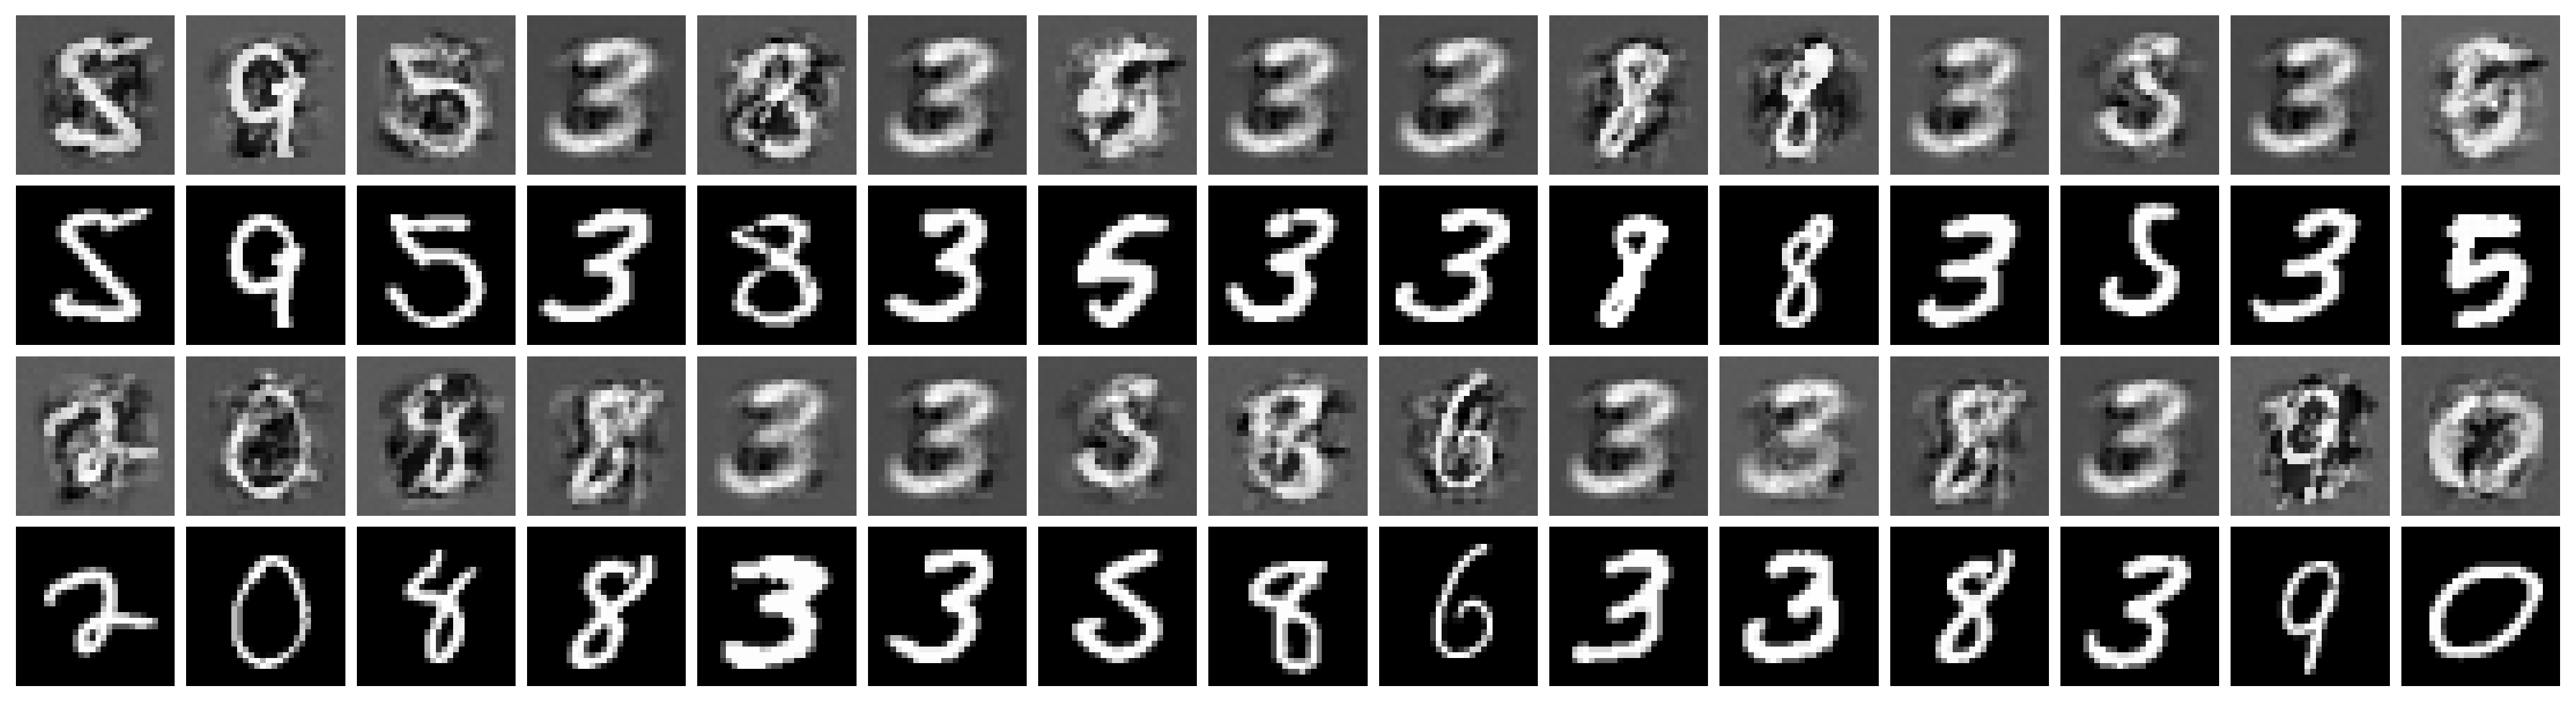

DONE!


In [12]:
# Find "Good" Resonctructions (as detailed in Appendix B.3):

# Find Nearest Neighbour
xx1 = find_nearest_neighbour(X, Xtrn, search='ncc', vote='min', use_bb=False, nn_threshold=None)
# Scale to Images
xx_scaled, yy_scaled = scale(xx1, Xtrn, ds_mean)
# # Sort
xx, yy, ssims, sort_idxs = sort_by_metric(xx_scaled, yy_scaled, sort='ssim')
values = model(Xtrn).data

# Plot
# color_by_labels = Ytrn[sort_idxs]
color_by_labels = None
figpath=None
analysis.plot_table(xx, yy, fig_elms_in_line=15, fig_lines_per_page=4, fig_type='one_above_another', color_by_labels=color_by_labels, figpath=figpath, show=True, dpi=100)

### Show Weights of first Layer

CUT the end of the zipped bla because it might have different shape before torch.cat
torch.Size([990, 1, 28, 28]) 66


  0%|          | 0/17 [00:00<?, ?it/s]

0 0 60


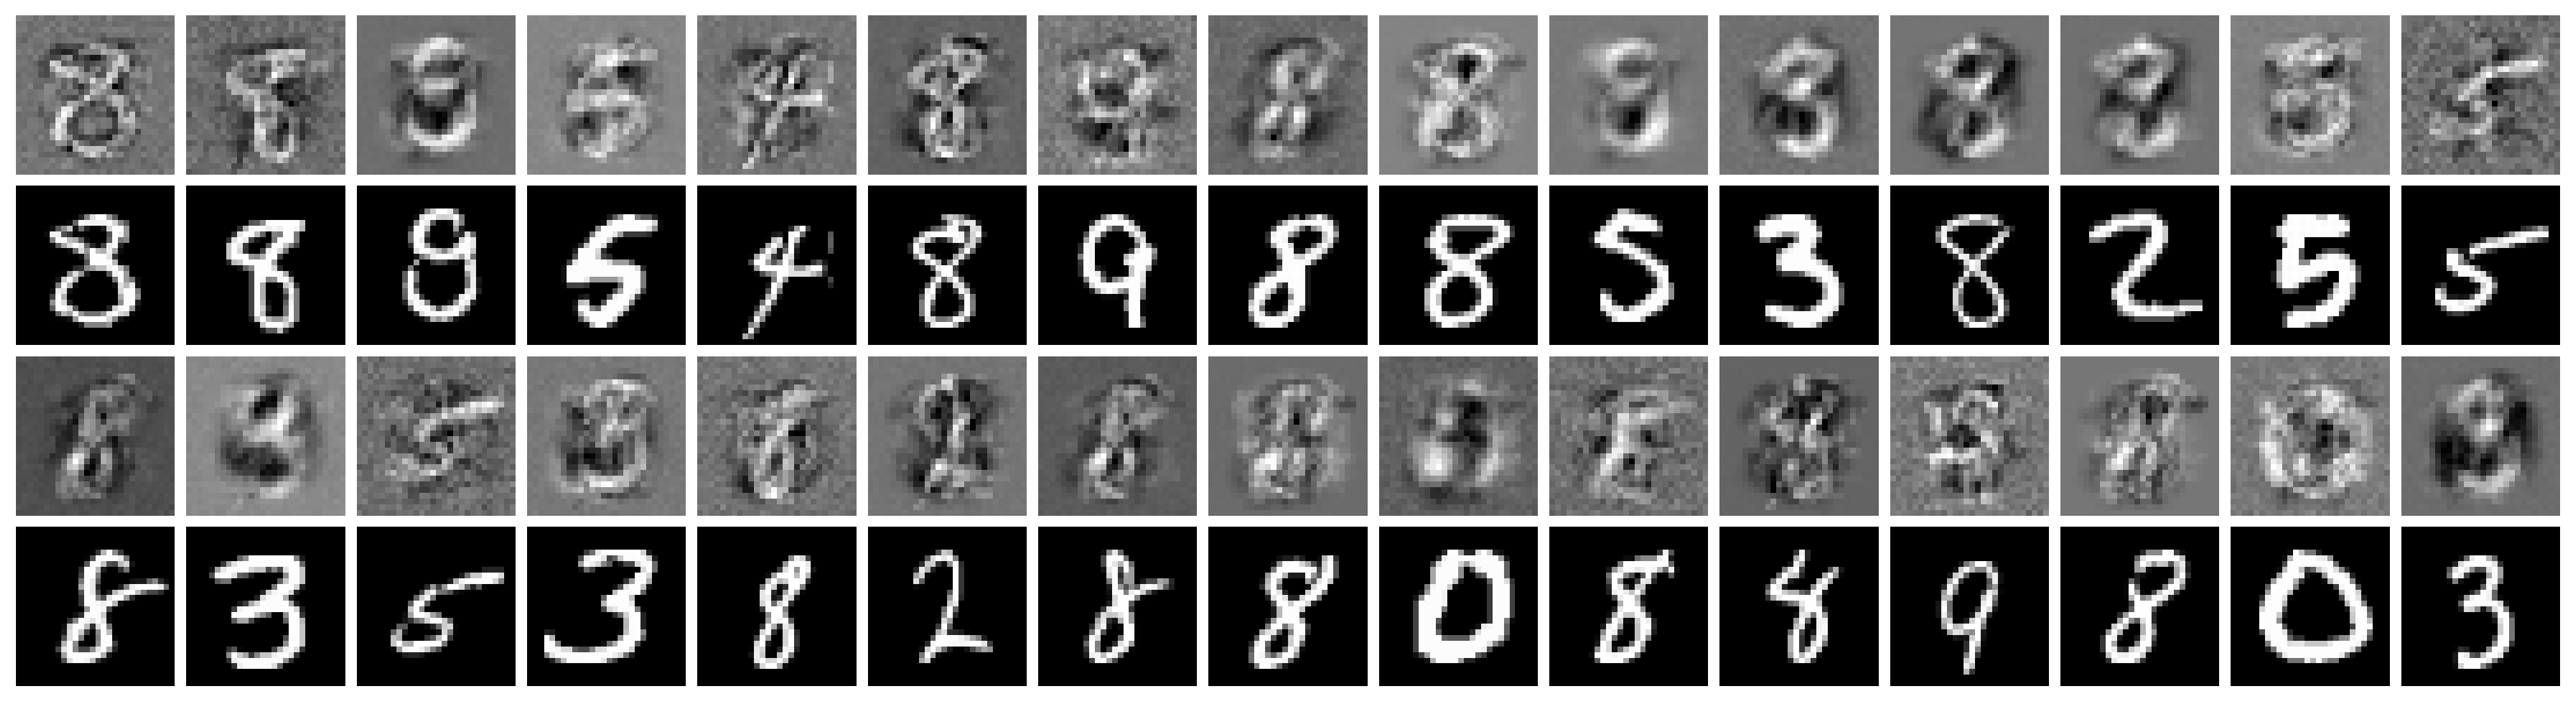

DONE!


In [6]:
# Show how the weights of the first layer looks like, for comparison.
# Note that some data samples can be found in the first layer, but not as near as many that can be reconstructed using our approach.

X = sweep.W.reshape(sweep.W.shape[0], 1, 28, 28)

# Find Nearest Neighbour
# xx1 = find_nearest_neighbour(X, Xtrn, search='ncc', vote='min', use_bb=False, nn_threshold=None)
xx1 = find_nearest_neighbour(X, Xtrn, search='ncc', vote='mean', use_bb=True, nn_threshold=1.1)
# Scale to Images
xx_scaled, yy_scaled = scale(xx1, Xtrn, ds_mean, xx_add_ds_mean=False)
# Sort
xx, yy, ssims, sort_idxs = sort_by_metric(xx_scaled, yy_scaled, sort='ssim')
# Plot
analysis.plot_table(xx, yy, fig_elms_in_line=15, fig_lines_per_page=4, fig_type='one_above_another', color_by_labels=None, figpath=None, show=True, dpi=100)


In [13]:
X.shape

torch.Size([1000, 1, 28, 28])

C:\Users\Mahdi\AppData\Local\Temp/ipykernel_26812/3707971496.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(2,2))


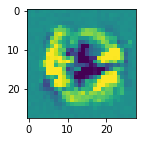

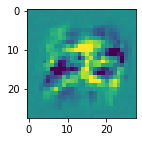

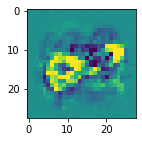

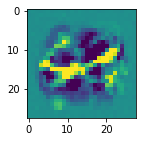

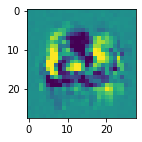

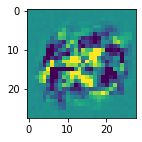

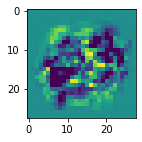

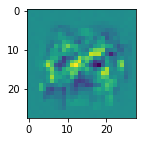

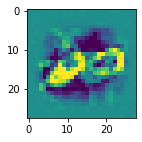

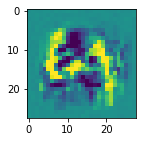

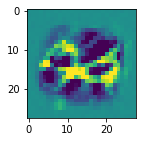

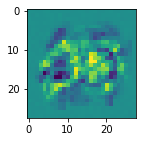

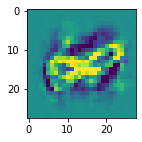

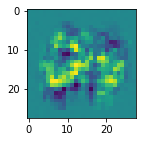

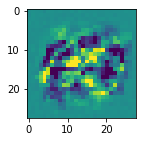

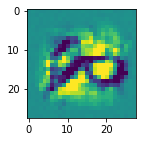

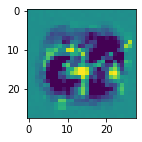

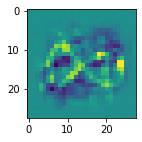

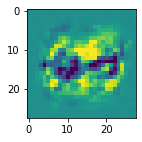

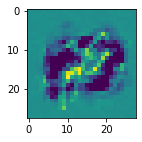

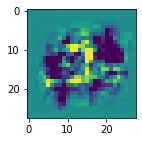

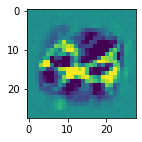

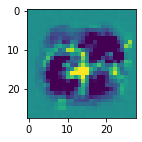

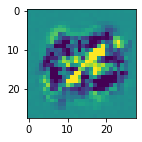

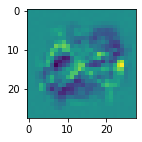

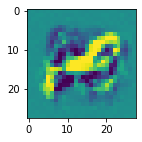

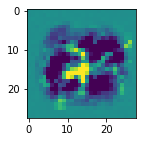

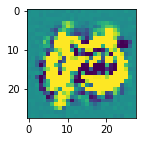

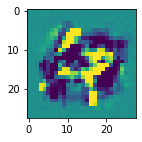

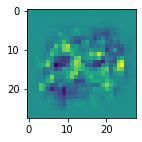

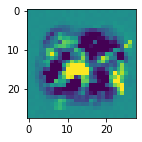

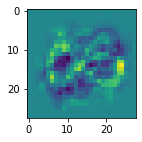

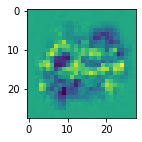

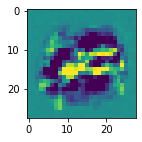

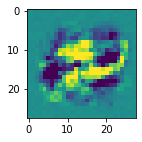

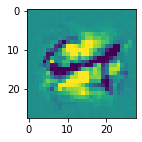

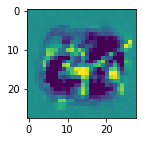

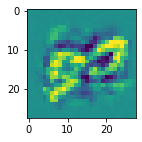

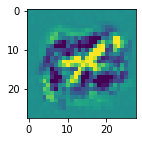

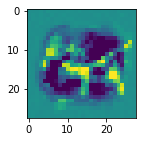

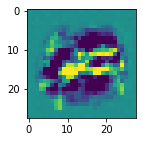

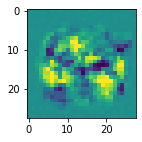

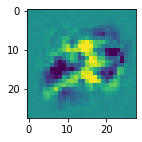

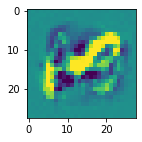

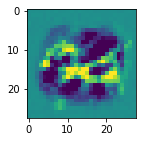

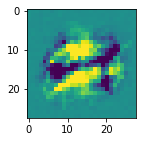

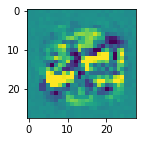

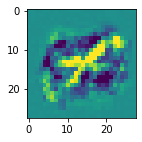

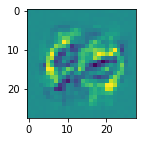

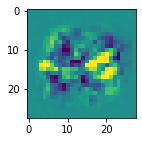

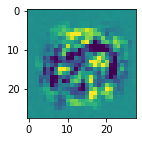

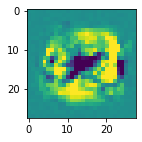

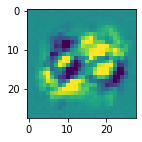

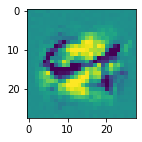

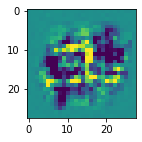

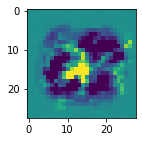

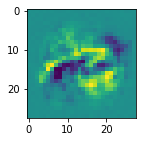

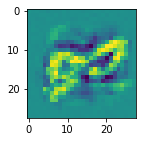

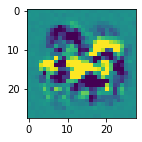

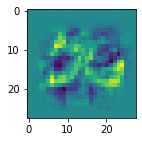

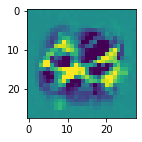

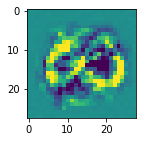

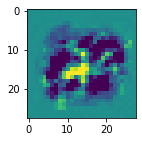

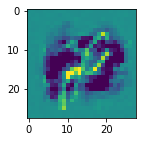

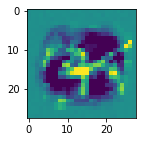

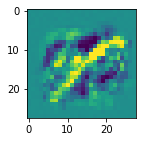

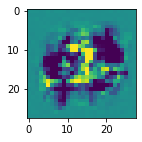

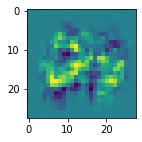

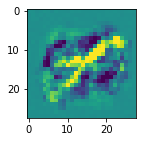

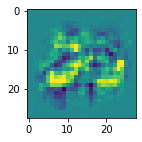

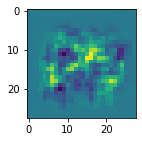

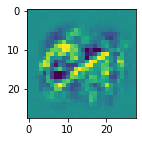

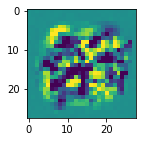

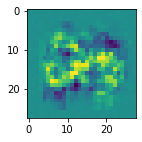

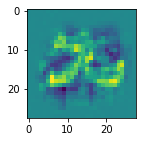

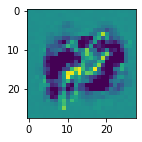

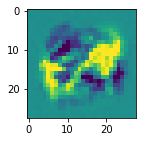

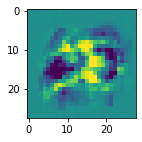

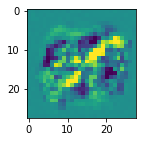

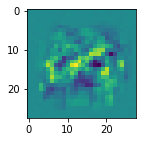

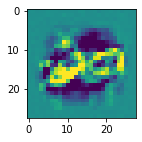

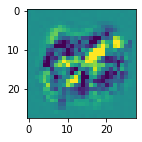

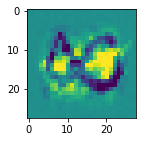

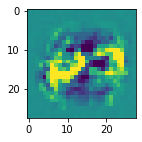

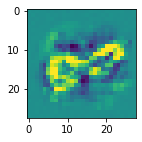

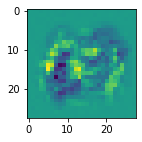

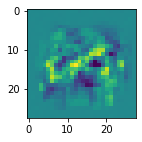

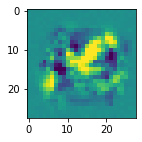

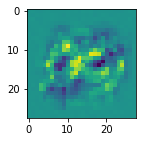

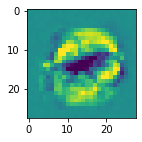

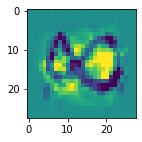

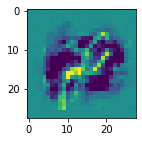

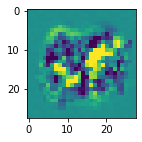

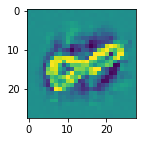

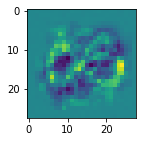

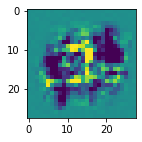

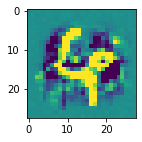

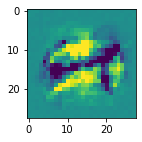

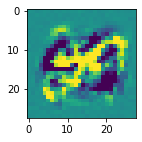

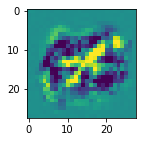

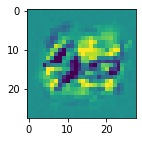

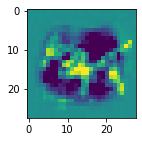

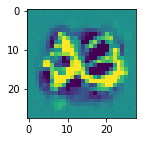

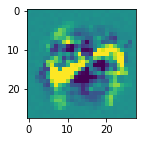

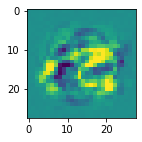

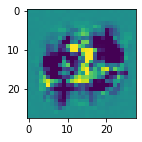

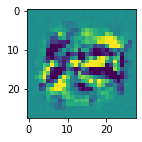

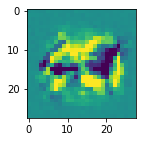

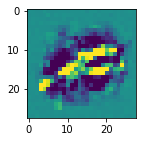

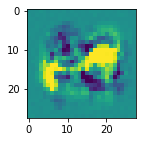

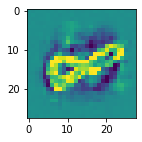

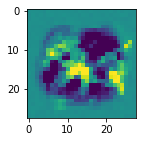

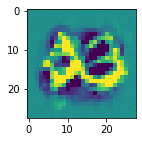

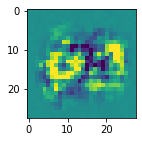

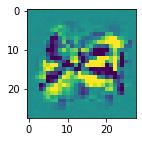

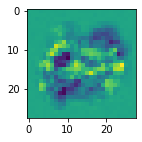

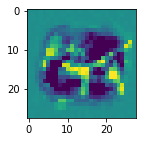

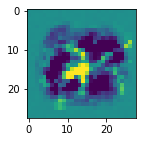

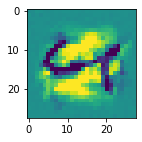

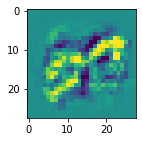

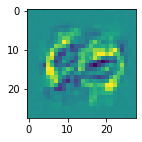

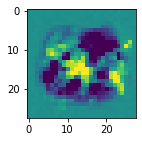

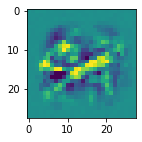

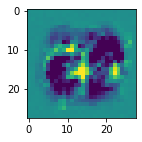

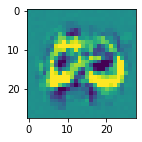

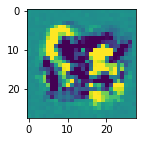

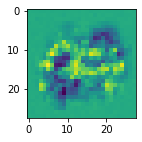

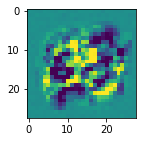

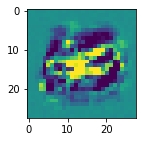

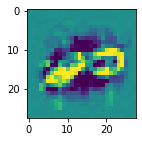

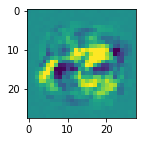

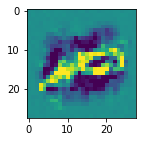

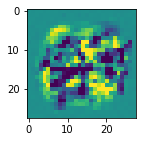

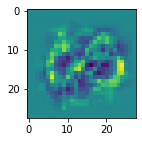

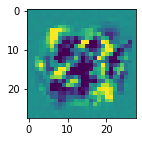

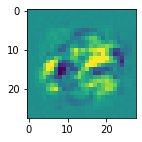

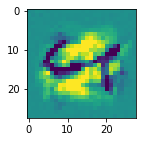

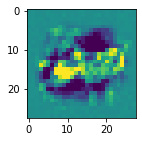

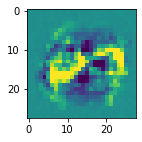

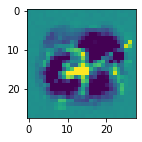

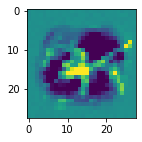

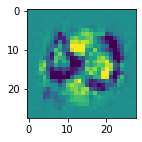

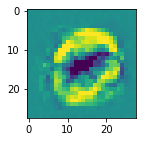

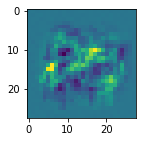

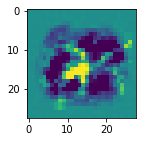

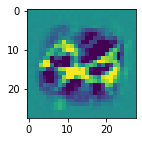

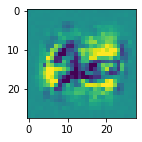

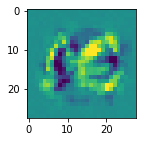

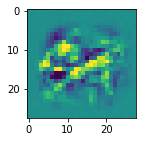

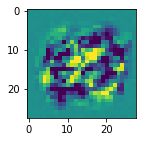

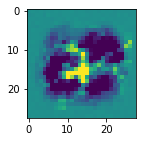

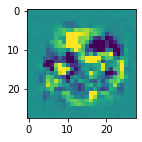

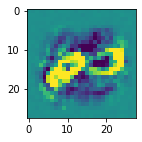

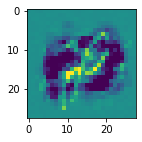

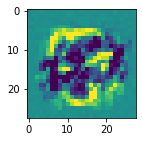

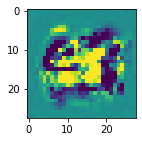

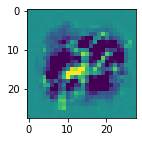

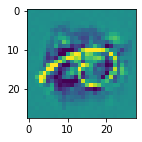

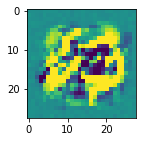

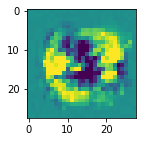

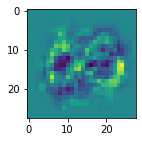

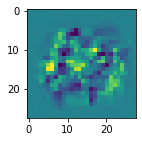

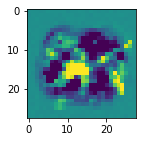

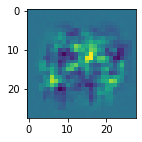

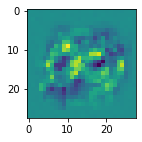

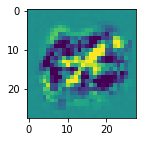

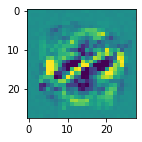

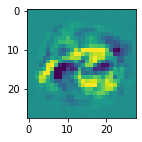

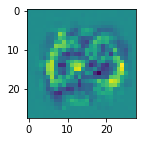

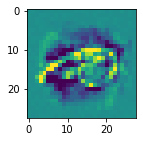

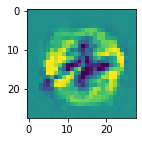

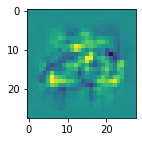

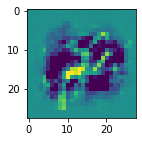

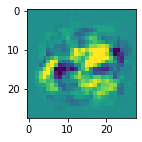

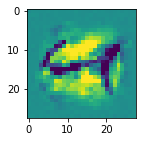

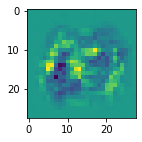

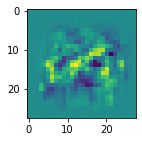

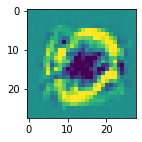

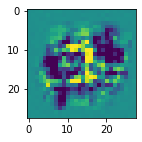

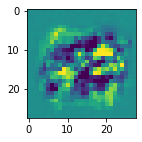

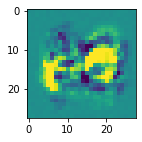

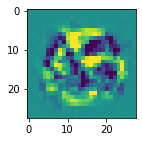

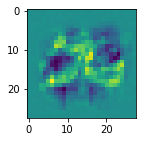

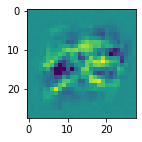

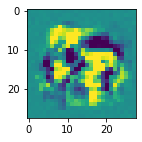

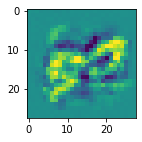

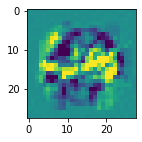

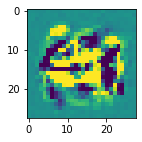

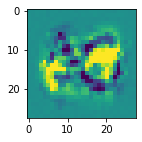

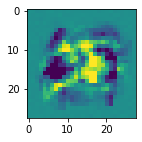

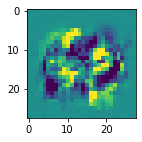

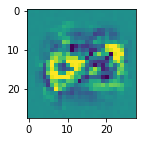

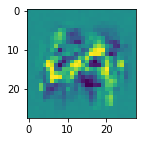

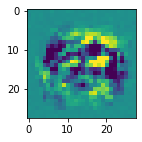

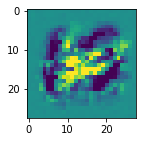

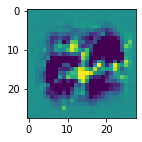

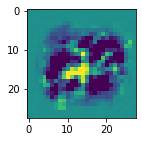

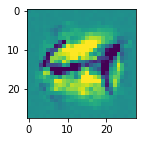

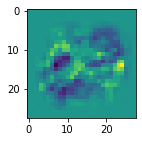

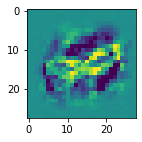

In [20]:
for i in range(200):
    plt.figure(figsize=(2,2))
    plt.imshow(X[i].permute(2,1,0).detach().numpy())

In [22]:
Xtrn.shape

torch.Size([500, 1, 28, 28])

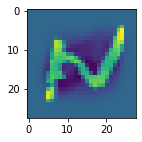

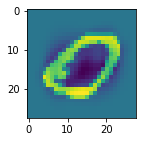

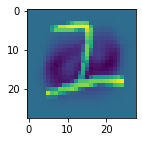

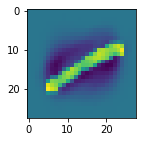

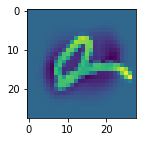

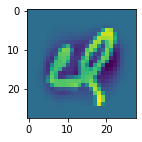

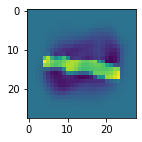

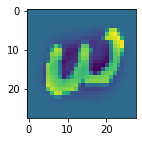

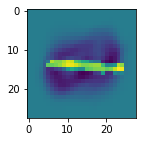

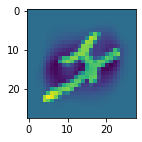

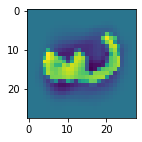

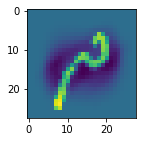

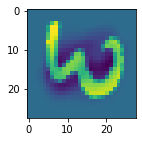

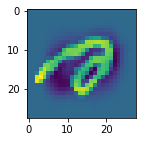

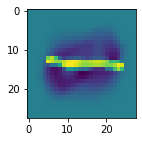

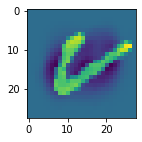

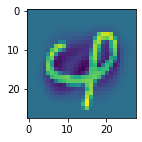

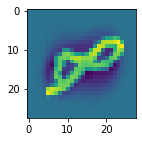

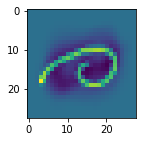

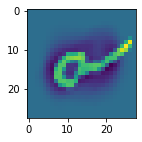

In [25]:
for i in range(20):
    plt.figure(figsize=(2,2))
    plt.imshow(Xtrn[i].permute(2,1,0).detach().numpy())